# **HISTOGRAM MATCHING**

Histogram matching, also known as histogram equalization or histogram specification, is a technique used in image processing to adjust the distribution of pixel intensity values in an image to match a desired or reference distribution.

## ABOUT THE DATASET (IXI- DATASET)

In this project we have collected nearly 600 MR images from normal, healthy subjects. The MR image acquisition protocol for each subject includes T1 Images

The data has been collected at three different hospitals in London:

    Hammersmith Hospital using a Philips 3T system (details of scanner parameters)
    Guy’s Hospital using a Philips 1.5T system (details of scanner parameters)
    Institute of Psychiatry using a GE 1.5T system (details of the scan parameters not available at the moment)

The data has been collected as part of the project:
IXI – Information eXtraction from Images (EPSRC GR/S21533/02)

Reference Link - https://brain-development.org/ixi-dataset/


In [37]:
# # IXI - DATASET
# file_HH = 'IXI-T1\IXI012-HH-1211-T1.nii.gz'     #Hammersmith Hospital
# file_GH = 'IXI-T1\IXI002-Guys-0828-T1.nii.gz'   #Guy's Hospital

In [38]:
#ADNI DATASET
file_HH = r'New folder\1.5T.nii'
file_GH = r'New folder\3T.nii' 

In [39]:
import nibabel as nib
import scipy.ndimage as ndi
contents_HH = nib.load(file_HH)
contents_GH = nib.load(file_GH)

In [40]:
index_HH = contents_HH.shape[2]
index_GH = contents_GH.shape[2]

In [41]:
index_GH, index_HH

(170, 160)

In [42]:
img_GH = contents_GH.get_fdata()[:, :, 100]
img_HH = contents_HH.get_fdata()[:, :, 100]

In [43]:
from skimage import exposure

# Perform histogram matching
matched_slice_1_5T = exposure.match_histograms(img_HH, img_GH)


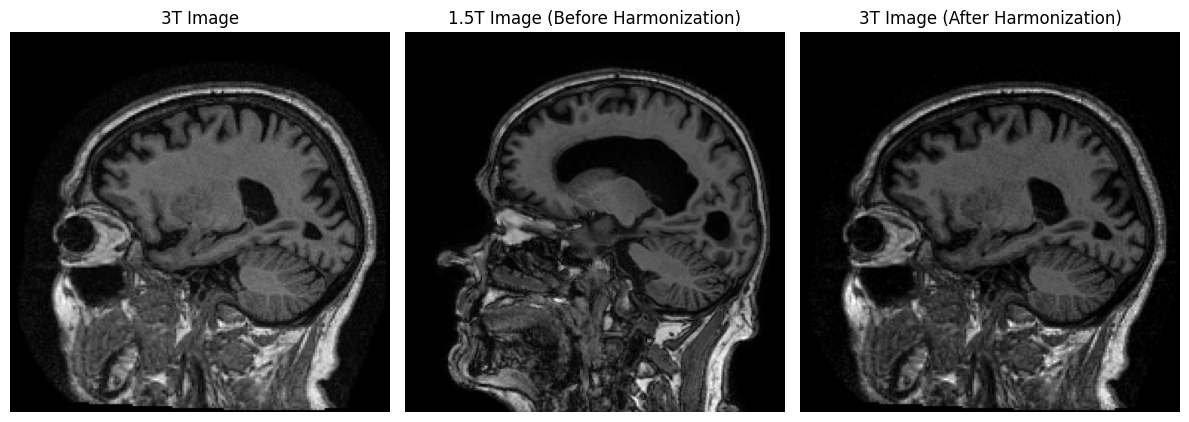

In [44]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.ndimage as ndi

# Display the original and matched images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(ndi.rotate(img_HH,0), cmap=cm.gray)
plt.title('3T Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ndi.rotate(img_GH,0), cmap=cm.gray)
plt.title('1.5T Image (Before Harmonization)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ndi.rotate(matched_slice_1_5T,0), cmap=cm.gray)
plt.title('3T Image (After Harmonization)')
plt.axis('off')

plt.tight_layout()
plt.show()


(-0.5, 191.5, 191.5, -0.5)

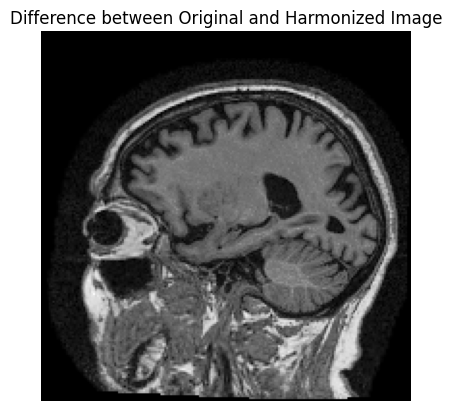

In [45]:
#Check DIfference
check = img_HH - matched_slice_1_5T
plt.imshow(ndi.rotate(check,0),cmap='gray')
plt.title('Difference between Original and Harmonized Image')
plt.axis('off')